In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7176, 4)

In [6]:
type('Country or Area')

str

In [7]:
type('Year')

str

In [8]:
type('Value')

str

In [9]:
type('Value Footnotes')

str

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

View column names

In [11]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

Change column names

In [12]:
gdp_df.columns = ['country', 'year', 'gdp_per_capita']

In [13]:
gdp_df.columns

Index(['country', 'year', 'gdp_per_capita'], dtype='object')

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

Find range of years in data set (+1 inclusive)

In [14]:
print(gdp_df['year'].max())
print(gdp_df['year'].min())
print(2020 - 1990 + 1)

2020
1990
31


Create df of all country-year pairs. Create lists of all countries, with and without duplicates. Create list of all years, with dupes.

In [15]:
cy = gdp_df.drop( columns = 'gdp_per_capita')
cy = cy.drop_duplicates()
cy.head()

c_u = cy.drop( columns = 'year')
c_dupes = c_u.country.tolist()
c_list = c_u.drop_duplicates()
c_list = c_list.country.tolist()


year = cy.drop ( columns = 'country')
year_dupe = year.year.tolist()
year_u = year.drop_duplicates()
year_u = year_u.year.tolist()

cd_dict {country_name : #_yrs_data}

In [16]:
cd_dict = {}

accum = 0

for c in c_dupes:
    if c not in cd_dict:
        cd_dict[c] = 0
    
    cd_dict[c] = cd_dict[c] + 1   

num_dict = {#_of_years : countries with that many years data}

In [17]:
num_dict = {}

for n in range(1,32):
    num_dict[n] = 0
    

for n in cd_dict.values():
    num_dict[n] = num_dict[n] + 1
    
num_dict

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 2,
 9: 0,
 10: 2,
 11: 0,
 12: 0,
 13: 1,
 14: 0,
 15: 1,
 16: 0,
 17: 1,
 18: 0,
 19: 1,
 20: 1,
 21: 6,
 22: 1,
 23: 0,
 24: 4,
 25: 0,
 26: 11,
 27: 2,
 28: 1,
 29: 1,
 30: 2,
 31: 205}

7.a How many countries have data for all years? **Answer** 205

7.b Which countries are missing many years of data?

In [18]:
cd_counts = gdp_df.country.value_counts()
cd_counts.head()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
Name: country, dtype: int64

In [19]:
cd_counts = cd_counts.to_frame()
cd_counts.shape

(242, 1)

In [20]:
cd_counts = cd_counts.reset_index()
cd_counts.head()

,index,country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31


In [21]:
cd_counts.columns = ['country','count_yrs']
cd_counts.head()

,country,count_yrs
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31


In [22]:
cd_counts['count_yrs'].tolist()

[31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,


7.b Which countries are missing many years of data?

Data was collected for 31 years. Below are the 20 countries with the least data.

In [23]:
cd_counts.tail(20)

,country,count_yrs
222,Canada,24
223,Montenegro,24
224,Small states,24
225,San Marino,24
226,Libya,22
227,Other small states,21
228,Liberia,21
229,Timor-Leste,21
230,CuraÃ§ao,21
231,Qatar,21


7.c Look at the number of observations per year. What do you notice? 

Over time, the number of observations per year has increased, especially in the 90s. 

In [24]:
count_by_year = {}

for y in year_dupe:
    if y not in count_by_year:
        count_by_year[y] = 0
    
    count_by_year[y] += 1
    
count_by_year    

{2020: 240,
 2019: 241,
 2018: 242,
 2017: 242,
 2016: 242,
 2015: 242,
 2014: 242,
 2013: 242,
 2012: 240,
 2011: 240,
 2010: 239,
 2009: 239,
 2008: 238,
 2007: 237,
 2006: 237,
 2005: 236,
 2004: 236,
 2003: 235,
 2002: 235,
 2001: 234,
 2000: 233,
 1999: 227,
 1998: 226,
 1997: 226,
 1996: 222,
 1995: 222,
 1994: 211,
 1993: 209,
 1992: 208,
 1991: 207,
 1990: 206}

create years / observation count dataframe

In [25]:
yr_list = list(count_by_year.keys())
cnt_list = list(count_by_year.values())

yr_df = pd.DataFrame(list(zip(yr_list, cnt_list)), columns = ['year','observ_count'])
yr_df.head()

,year,observ_count
0,2020,240
1,2019,241
2,2018,242
3,2017,242
4,2016,242


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Masking data to isolate 2020 date

In [26]:
gdp_2020 = gdp_df.loc[gdp_df['year'] == 2020]

gdp_2020.head()

,country,year,gdp_per_capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539


Histogram - gdp_per_capita by country count

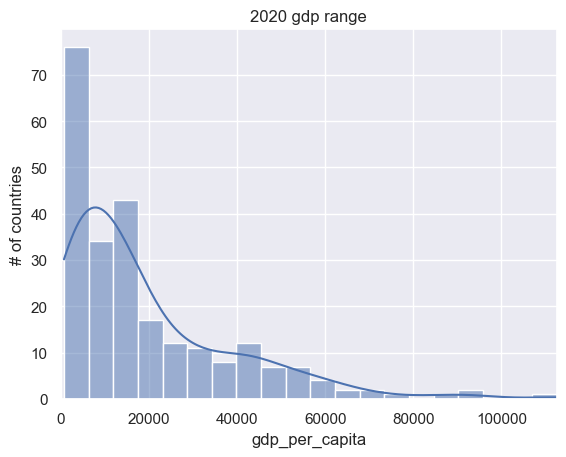

In [27]:
sns.set(style = 'darkgrid')

sns.histplot (data = gdp_2020, x = 'gdp_per_capita', bins = 20, kde = True)
plt.ylabel('# of countries')
plt.title ('2020 gdp range')
plt.xlim(0, max(gdp_2020.gdp_per_capita))
plt.show()

Density Plot

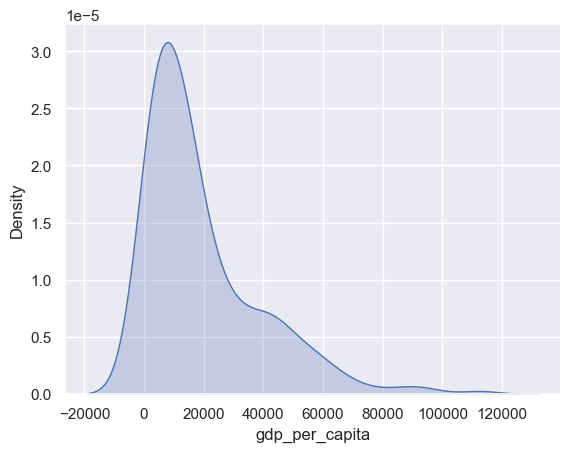

In [28]:
sns.kdeplot(gdp_2020 ['gdp_per_capita'], shade = True)

gdp_df.gdp_per_capita.max()
plt.show()

Boxplot

Simple boxplot (pandas)

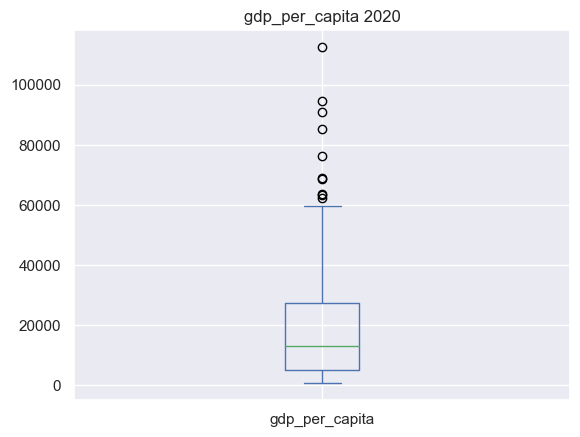

In [29]:
gdp_2020['gdp_per_capita'].plot(kind = 'box')
plt.title('gdp_per_capita 2020')
plt.show()

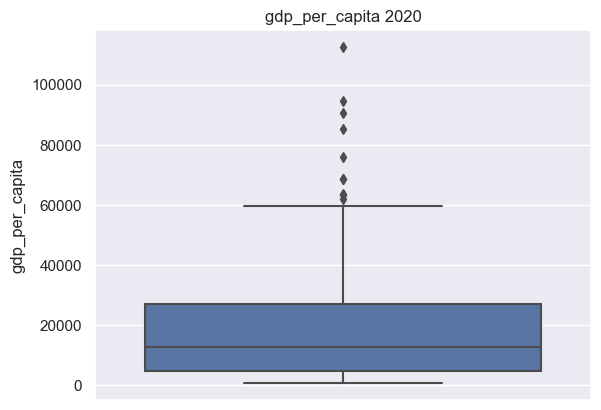

In [30]:
sns.boxplot(y = gdp_2020['gdp_per_capita'])
plt.title('gdp_per_capita 2020')
plt.show()

Violin

<AxesSubplot:xlabel='gdp_per_capita'>

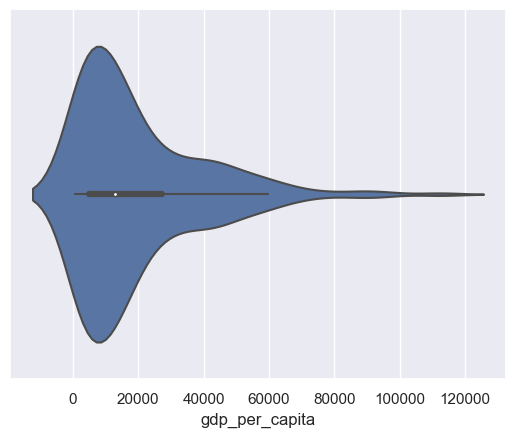

In [31]:
sns.violinplot(x = gdp_2020['gdp_per_capita'])

9. What was the median GDP per capita value in 2020? **Answer** $12,909

In [32]:
round(gdp_2020.gdp_per_capita.median())

12909

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

10 **Answers**
    
The per_capita_gdp has gotten gradually higher over the years.

The box plot doesn't allow for the years to be separated apart, though its easy for the eye to process, assuming it accurately represents the required data.

The barplot is a very easy visualization of simple data.

The scatterplot seems most useful with a trend line, or if the data were more diffuse over the years. I liked the way it looks with custom marks. 

Masking data

In [33]:
gdp_decades = gdp_df.loc[(gdp_df['year'] == 1990) | (gdp_df['year'] == 2000) | (gdp_df['year'] == 2010) | (gdp_df['year'] == 2020)]

boxplot

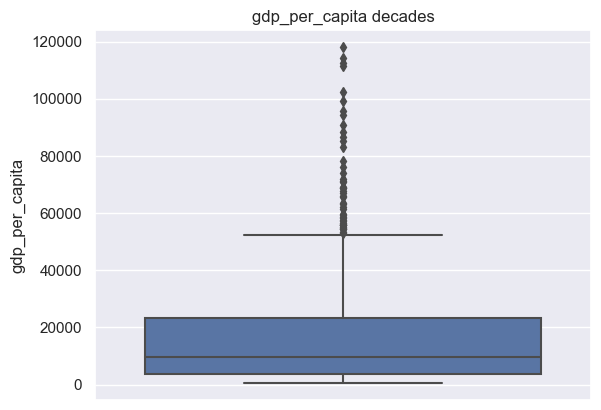

In [34]:
sns.boxplot(y = gdp_decades['gdp_per_capita'])
plt.title('gdp_per_capita decades')
plt.show()

barplot

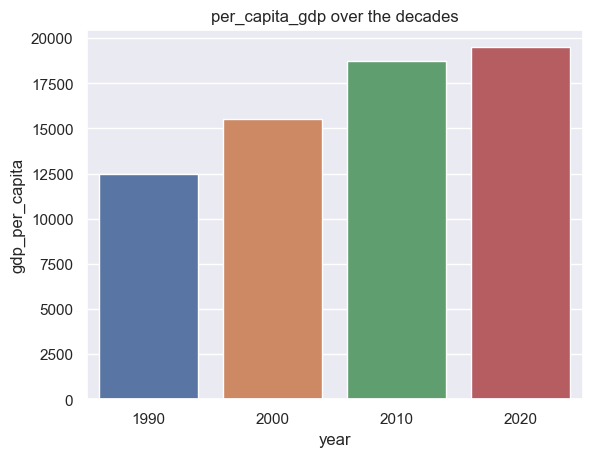

In [35]:
sns.barplot(x = 'year', y = 'gdp_per_capita', data = gdp_decades, ci = None)

plt.title('per_capita_gdp over the decades')
plt.show()

scatterplot

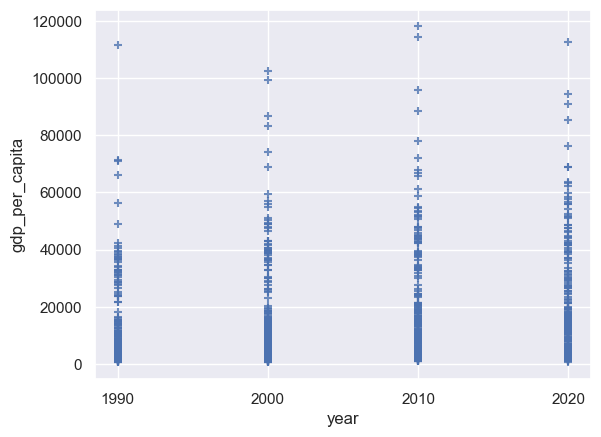

In [36]:
sns.regplot(x = gdp_decades['year'], y = gdp_decades['gdp_per_capita'], marker = '+', fit_reg = False)
plt.xticks([1990, 2000, 2010, 2020])

plt.show()

scatterplot with trend line

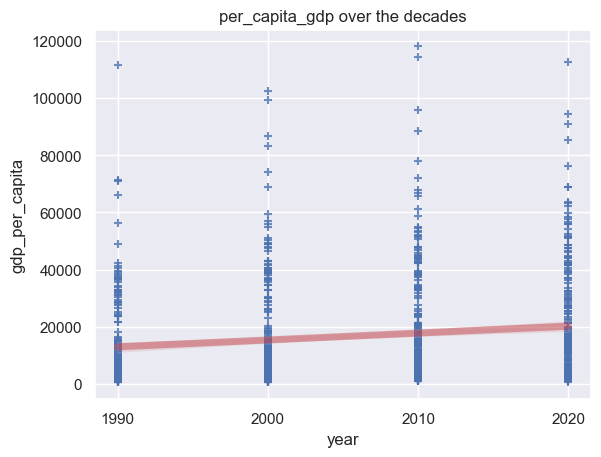

In [37]:
sns.regplot(x = gdp_decades['year'], y = gdp_decades['gdp_per_capita'], marker = '+', line_kws = {'color':'r', 'alpha':.5, 'lw':5})
plt.xticks([1990, 2000, 2010, 2020])
plt.title('per_capita_gdp over the decades')

plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In 1990 the UAE had a gpd of $111,454

In [38]:
gdp_100k = gdp_df.loc[gdp_df.gdp_per_capita > 100000]
gdp_100k.sort_values(by = 'year').head(1)

,country,year,gdp_per_capita
6838,United Arab Emirates,1990,111454.055665


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

**Answer** Luxembourg had the highest GDP in 2020 (112,557)

In [39]:
gdp_2020.sort_values(by = 'gdp_per_capita', ascending = False).head(1)

,country,year,gdp_per_capita
3882,Luxembourg,2020,112557.309472


In [40]:
lux_gdp = gdp_df.loc[gdp_df.country == 'Luxembourg']

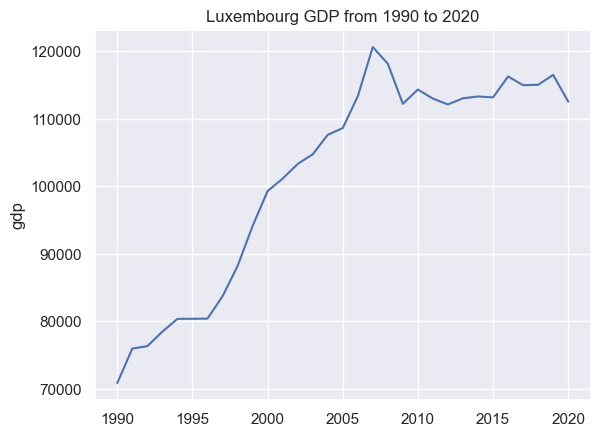

In [41]:
plt.plot('year','gdp_per_capita', data = lux_gdp)
plt.ylabel('gdp')
plt.title('Luxembourg GDP from 1990 to 2020')

plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Brundi had the lowest GDP in 2020 (731).

In [42]:
gdp_2020.sort_values(by = 'gdp_per_capita', ascending = True).head(1)

,country,year,gdp_per_capita
914,Burundi,2020,731.064074


In [43]:
burundi_gdp = gdp_df.loc[gdp_df.country == 'Burundi']

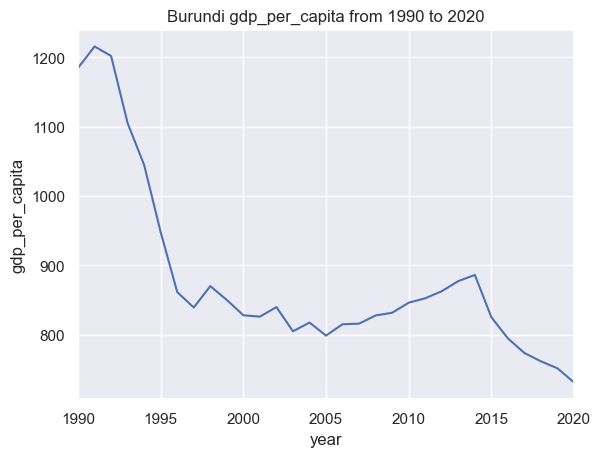

In [44]:
plt.plot('year', 'gdp_per_capita', data = burundi_gdp)
plt.ylabel('gdp_per_capita')
plt.xlabel('year')
plt.title('Burundi gdp_per_capita from 1990 to 2020')
plt.xlim(1990, 2020)

plt.show()

 13. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Create dataset for 1990 data

In [45]:
gdp_1990 = gdp_df.loc[gdp_df.year == 1990]

pseudo-inner join to put 1990 and 2020 on the same line

In [46]:
gdp_9020 = pd.merge(gdp_1990, gdp_2020, left_on = 'country', right_on = 'country', how = 'inner')
gdp_9020.head()

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839


In [47]:
gdp_9020.columns = ['country', '1990', '1990_gdp', '2020', '2020_gdp']
gdp_9020.head()

,country,1990,1990_gdp,2020,2020_gdp
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839


add column to calculate 2020 - 1990 delta

In [48]:
gdp_9020['gdp_delta'] = gdp_9020['2020_gdp'] - gdp_9020['1990_gdp']
gdp_9020.head()

,country,1990,1990_gdp,2020,2020_gdp,gdp_delta
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104,408.001305
1,Africa Western and Central,1990,2810.341129,2020,4021.293919,1210.952790
2,Albania,1990,4827.034551,2020,13253.733337,8426.698787
3,Algeria,1990,8746.340762,2020,10735.382539,1989.041777
4,Angola,1990,5758.950488,2020,6141.963839,383.013352


In [49]:
gdp_decline = gdp_9020.loc[gdp_9020.gdp_delta < 0]
gdp_decline.head()

,country,1990,1990_gdp,2020,2020_gdp,gdp_delta
9,Aruba,1990,32589.018572,2020,29563.756955,-3025.261617
15,Barbados,1990,13985.829980,2020,13316.487393,-669.342587
25,Brunei,1990,71232.789430,2020,62200.882043,-9031.907387
28,Burundi,1990,1184.842032,2020,731.064074,-453.777958
33,Central African Republic,1990,1201.674665,2020,937.856470,-263.818195


22 countries saw a decline in GDP from 1990 to 2020

In [50]:
gdp_decline.shape

(22, 6)

Which countries had lower GDP per capita in 2020 than in 1990?
**Answer** countries with declining GDP

In [51]:
declining_countries = gdp_decline.country.tolist()
declining_countries

['Aruba',
 'Barbados',
 'Brunei',
 'Burundi',
 'Central African Republic',
 'Comoros',
 'Congo',
 'Dem. Rep. Congo',
 'Fragile and conflict affected situations',
 'Gabon',
 'Guinea-Bissau',
 'Haiti',
 'Kiribati',
 'Kyrgyz Republic',
 'Madagascar',
 'Oman',
 'Tajikistan',
 'The Bahamas',
 'The Gambia',
 'Ukraine',
 'United Arab Emirates',
 'Zimbabwe']

Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?

**Answer** Most countries had a higher gdp per capita in 2020 than in 1990.

From 1990 to 2020 the average gdp increased by 7,030. The median gdp increased by 6,880. There are 242 countries/regions represented in the data and only 22 (<10%) saw a decline in gdp from 1990 to 2020. 

In [52]:
gdp_change = gdp_2020.gdp_per_capita.mean() - gdp_1990.gdp_per_capita.mean()
gdp_change

7030.940084531894

In [53]:
gdp_med_change = gdp_2020.gdp_per_capita.median() - gdp_1990.gdp_per_capita.median()
gdp_med_change

6880.7926739122395

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [54]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)

In [55]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [56]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [57]:
type(internet_df['Country or Area'])

pandas.core.series.Series

In [58]:
type(internet_df['Year'])

pandas.core.series.Series

In [59]:
type(internet_df['Value'])

pandas.core.series.Series

In [60]:
type(internet_df['Value Footnotes'])

pandas.core.series.Series

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [61]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [62]:
internet_df.columns = ['country', 'year','internet_users_pct']
internet_df.columns

Index(['country', 'year', 'internet_users_pct'], dtype='object')

16. Look at the number of observations in this dataset per year. What do you notice?

**Answer** There is a huge spike in observations in 1990, then a sudden decline, and gradual increase.

In [63]:
year_counts = internet_df.year.value_counts()
year_counts = year_counts.to_frame()

In [64]:
year_counts.head()

,year
1990,210
2011,207
2007,206
2008,204
2012,203


In [65]:
year_counts = year_counts.reset_index()

In [66]:
year_counts.columns = ['year', 'no_obs']
year_counts.sort_values(by = 'year')

,year,no_obs
42,1960,7
27,1965,7
28,1970,7
29,1975,7
30,1976,7
31,1977,7
32,1978,7
33,1979,7
26,1980,7
35,1981,7


17. What is the first year to have a non-zero internet users percentage value?
**Answer** 1990 was the first year to have a non-zero value.

In [67]:
internet_df.sort_values(by = 'year')
non_zero = internet_df.loc[internet_df.internet_users_pct > 0]

In [68]:
non_zero.sort_values(by = 'year')

,country,year,internet_users_pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


18. How does the distribution of internet users percent differ for 2000 and 2014?

**Answer** See boxplot. In 2000, the majority of the world had <20% internet users. In 2014, the majority had >20% internet users.

In [69]:
net_00 = internet_df.loc[internet_df.year == 2000]
net_14 = internet_df.loc[internet_df.year == 2014]

In [70]:
net_comp = pd.merge(net_00, net_14, left_on = 'country', right_on = 'country', how = 'inner')
net_comp.columns = ['country', '2000','2000_users_pct', '2014', '2014_users_pct']
net_comp

,country,2000,2000_users_pct,2014,2014_users_pct
0,Albania,2000,0.114097,2014,60.10
1,Algeria,2000,0.491706,2014,18.09
2,Andorra,2000,10.538836,2014,95.90
3,Angola,2000,0.105046,2014,21.26
4,Antigua and Barbuda,2000,6.482226,2014,64.00
...,...,...,...,...,...
188,Viet Nam,2000,0.254248,2014,48.31
189,Virgin Islands (U.S.),2000,13.815081,2014,50.07
190,Yemen,2000,0.082500,2014,22.55
191,Zambia,2000,0.191072,2014,17.34


In [71]:
yr_comp = internet_df.loc[(internet_df.year == 2000) | (internet_df.year == 2014)]
yr_comp.head()

,country,year,internet_users_pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706


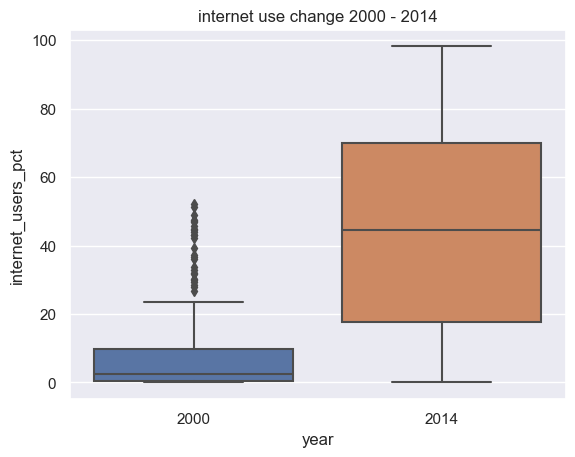

In [72]:
sns.boxplot (x = yr_comp['year'], y = yr_comp['internet_users_pct'])
plt.title('internet use change 2000 - 2014')
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?
**Answer** 16

In [73]:
net_14_5 = net_14.loc[net_14.internet_users_pct < 5]
net_14_5.shape

(16, 3)

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [74]:
gdp_df = gdp_df.sort_values(by = 'year', ascending = True)
internet_df = internet_df.sort_values(by = 'year', ascending = True)
internet_df.head()

,country,year,internet_users_pct
1663,Grenada,1960,0.0
665,Burundi,1960,0.0
3917,Syria,1960,0.0
2558,Maldives,1960,0.0
4018,Thailand,1960,0.0


In [75]:
print(gdp_df.shape)
print(internet_df.shape)

(7176, 3)
(4495, 3)


In [76]:
gdp_df['data_type'] = 'gdp'
internet_df['data_type'] = 'net'

In [77]:
print(gdp_df.columns)
print(internet_df.columns)

Index(['country', 'year', 'gdp_per_capita', 'data_type'], dtype='object')
Index(['country', 'year', 'internet_users_pct', 'data_type'], dtype='object')


In [78]:
gdp_and_internet_use = pd.concat([gdp_df, internet_df])

In [79]:
gdp_and_internet_use.shape

(11671, 5)

In [80]:
gdp_and_internet_use.head()

,country,year,gdp_per_capita,data_type,internet_users_pct
7175,Zimbabwe,1990,2652.129209,gdp,NaN
5688,Seychelles,1990,14884.887776,gdp,NaN
4279,Micronesia,1990,2995.141814,gdp,NaN
1065,Cameroon,1990,3379.825673,gdp,NaN
3688,Lebanon,1990,7507.587177,gdp,NaN


In [81]:
gdp_and_internet_use.tail()

,country,year,gdp_per_capita,data_type,internet_users_pct
929,Costa Rica,2014,NaN,net,49.41
2642,Mauritius,2014,NaN,net,41.44
953,Cote d'Ivoire,2014,NaN,net,14.60
3366,Saint Kitts and Nevis,2014,NaN,net,65.40
0,Afghanistan,2014,NaN,net,6.39


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [82]:
net_14 = net_14.sort_values(by = 'internet_users_pct', ascending = False)
net_14.head(3)

,country,year,internet_users_pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30


In [83]:
top_3 = gdp_df[(gdp_df['country'] == 'Iceland') | (gdp_df['country'] == 'Bermuda') | (gdp_df['country'] == 'Norway')]
top_3 = top_3.drop(columns = ['data_type'])
top_3.head()

,country,year,gdp_per_capita
669,Bermuda,1990,65961.406278
4904,Norway,1990,42136.603168
668,Bermuda,1991,63958.896254
4903,Norway,1991,43229.916320
667,Bermuda,1992,64385.407410


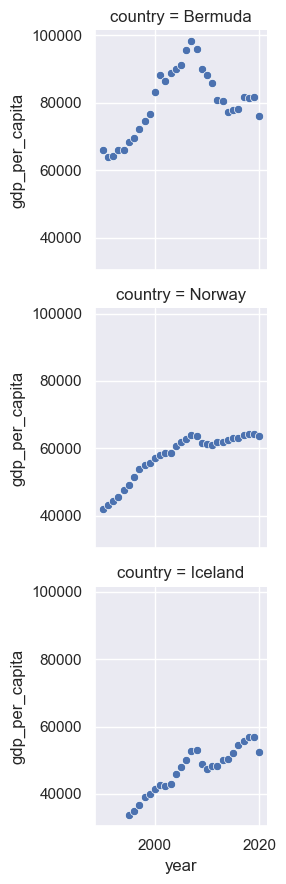

In [84]:
g = sns.FacetGrid(top_3, row = 'country')
g.map_dataframe(sns.scatterplot, x = 'year', y = 'gdp_per_capita')
plt.show()

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [85]:
gdp_net_14 = gdp_and_internet_use.loc[gdp_and_internet_use['year'] == 2014]
gdp_net_14.sort_values(by = 'gdp_per_capita')

,country,year,gdp_per_capita,data_type,internet_users_pct
1142,Central African Republic,2014,822.611195,gdp,NaN
920,Burundi,2014,886.235296,gdp,NaN
5877,Somalia,2014,917.876549,gdp,NaN
1530,Dem. Rep. Congo,2014,1029.790813,gdp,NaN
4756,Niger,2014,1126.805440,gdp,NaN
...,...,...,...,...,...
929,Costa Rica,2014,NaN,net,49.41
2642,Mauritius,2014,NaN,net,41.44
953,Cote d'Ivoire,2014,NaN,net,14.60
3366,Saint Kitts and Nevis,2014,NaN,net,65.40


In [86]:
gdp_2014 = gdp_df[gdp_df['year'] == 2014]
gdp_2014 = gdp_2014.drop(columns = ['data_type'])
gdp_2014

,country,year,gdp_per_capita
5767,Slovak Republic,2014,27322.142385
2772,IBRD only,2014,11306.030804
3664,Lebanon,2014,16879.181139
7000,Vanuatu,2014,2984.243485
3320,Kiribati,2014,1979.607555
...,...,...,...
6195,Sub-Saharan Africa (IDA & IBRD),2014,3892.826110
4286,Middle East & North Africa,2014,16035.577374
3695,Lesotho,2014,2639.445825
2370,Ghana,2014,4794.147084


In [87]:
internet_2014 = internet_df[internet_df['year'] == 2014]
internet_2014 = internet_2014.drop(columns = ['data_type'])
internet_2014

,country,year,internet_users_pct
3123,Papua New Guinea,2014,9.38
3016,Norway,2014,96.30
250,Bahamas,2014,76.92
3061,Pakistan,2014,13.80
351,Belgium,2014,85.00
...,...,...,...
929,Costa Rica,2014,49.41
2642,Mauritius,2014,41.44
953,Cote d'Ivoire,2014,14.60
3366,Saint Kitts and Nevis,2014,65.40


In [88]:
all_2014 = pd.merge(internet_2014, gdp_2014, right_on = 'country', left_on = 'country', how = 'inner')
all_2014 = all_2014.drop(columns = ['year_x', 'year_y'])
all_2014

,country,internet_users_pct,gdp_per_capita
0,Papua New Guinea,9.38,3908.864972
1,Norway,96.30,62390.130313
2,Pakistan,13.80,4695.588614
3,Belgium,85.00,48748.620593
4,Algeria,18.09,11512.690472
...,...,...,...
158,Rwanda,10.60,1780.144699
159,Tonga,40.00,5860.753910
160,Costa Rica,49.41,18669.096679
161,Mauritius,41.44,19240.224708


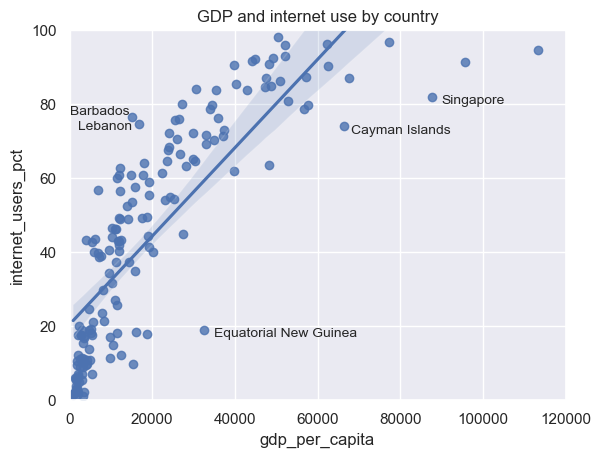

In [89]:
sns.regplot(x=all_2014['gdp_per_capita'], y=all_2014['internet_users_pct'])
plt.title('GDP and internet use by country')
plt.ylim(0, 100)
plt.xlim(0,120000)
plt.text(90000, 80, "Singapore", fontsize=10)
plt.text(68000, 72, "Cayman Islands", fontsize=10)
plt.text(35000, 17, "Equatorial New Guinea", fontsize=10)
plt.text(0, 77, "Barbados", fontsize = 10)
plt.text(2000, 73, "Lebanon", fontsize = 10)
plt.show()

In [90]:
high_gdp = all_2014[all_2014['gdp_per_capita'] > 60000]
high_gdp.sort_values(by = 'gdp_per_capita', ascending = False)

,country,internet_users_pct,gdp_per_capita
53,Luxembourg,94.67,113313.578898
96,Qatar,91.49,95578.261511
87,Singapore,82.00,87616.637527
118,Bermuda,96.80,77361.104881
33,Switzerland,87.00,67682.686175
108,Cayman Islands,74.10,66326.886773
111,United Arab Emirates,90.40,62452.184508
1,Norway,96.30,62390.130313


In [91]:
all_2014[(all_2014['internet_users_pct'] >70) & (all_2014['gdp_per_capita'] < 20000)]

,country,internet_users_pct,gdp_per_capita
16,Barbados,76.67,15043.729910
58,Lebanon,74.70,16879.181139


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [92]:
all_2014['gdp_group'] = pd.qcut(all_2014['gdp_per_capita'], 3, labels = ['low','medium','high'])

In [93]:
all_2014.head(50)

,country,internet_users_pct,gdp_per_capita,gdp_group
0,Papua New Guinea,9.38000,3908.864972,low
1,Norway,96.30000,62390.130313,high
2,Pakistan,13.80000,4695.588614,low
3,Belgium,85.00000,48748.620593,high
4,Algeria,18.09000,11512.690472,medium
5,Bangladesh,9.60000,4157.919304,low
6,Nicaragua,17.60000,5443.311610,low
7,Zambia,17.34000,3450.037600,low
8,Panama,44.92000,27352.519913,high
9,Austria,81.00000,52932.900112,high


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [99]:
high_gdp = all_2014[all_2014['gdp_group'] == 'high']
med_gdp = all_2014[all_2014['gdp_group'] == 'medium']
low_gdp = all_2014[all_2014['gdp_group'] == 'low']

print('high gdp median internet users', high_gdp['internet_users_pct'].median())
print('med gdp median internet users', med_gdp['internet_users_pct'].median())
print('low gdp median internet users', low_gdp['internet_users_pct'].median())

high gdp median internet users 79.69999999999999
med gdp median internet users 43.7
low gdp median internet users 10.7
